In [ ]:
a, b = 1,2
sum_pares= 0
while b<= 4000000:
    

In [21]:
a, b,aux = 1,2,0
count= 0
while b<= 4000000:
    count+=1
    aux=b
    b=a+b
    a=aux
    #if count>200:
    #    c=4000001
    #print(b)
print("the result is:")
print(a)
    
    
    

the result is:
3524578


In [23]:
def printFibonacci(limit):
    a, b,aux = 1,2,0
    count= 0
    while b<= limit:
        count+=1
        aux=b
        b=a+b
        a=aux
        print(b)
    

In [26]:
printFibonacci(500000)

3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765
10946
17711
28657
46368
75025
121393
196418
317811
514229


In [8]:
import matplotlib.pyplot as plt
import numpy as np

def printFibonacciArray(limit):
    y=[]
    x=[]
    a, b,aux = 1,2,0
    count= 0
    while b<= limit:
        count+=1
        aux=b
        b=a+b
        a=aux
        y.append(b)
        x.append(count)
    return(x,y)

def plotFionachi(limit):
    x,y= printFibonacciArray(limit)
    xpoints = x
    ypoints = y

    plt.plot(xpoints, ypoints)
    plt.show()



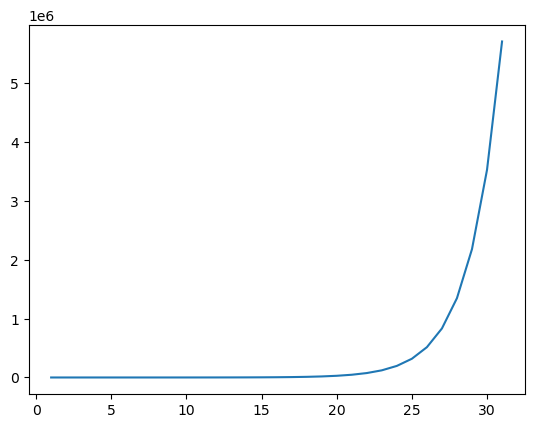

In [9]:
plotFionachi(4000000)

pygame 2.6.1 (SDL 2.28.4, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


NameError: name 'dibujar_serpiente' is not defined

In [13]:
import turtle                           #La libreria turtle ayuda a construir la interfaz gráfica
import time                             #Para obtenier el tiempo
import random                           #Para usar numeros random

posponer = 0.1
puntaje = 0
maxPuntaje = 0

#Configuración
window = turtle.Screen()                #Crea una ventana nueva
window.title('Snake')                   #Ponemos titulo
window.bgcolor('#353535')               #Color de fondo
window.setup(width=600,height=600)      #Redimensionar pantalla
window.tracer(0)                        #Ayuda a hacer la animación mas placentera

#Cabeza de la serpiente
cabeza = turtle.Turtle()                #Crea un objeto para mostrar en pantalla
cabeza.speed(0)                         #Se muestra al inciar
cabeza.shape('square')                  #Se le asigna forma de cuadrado, por defecto es 20x20 pixeles
cabeza.color('#75C46D')                 #Color a la cabeza
cabeza.penup()                          #Elimina el rastro del objeto
cabeza.goto(0,0)                        #Centra el objeto
cabeza.direction = 'stop'               #Asigna direccion, en este caso estatico

#Comida
comida = turtle.Turtle()
comida.speed(0)
comida.shape('circle')
comida.color('#D12D2D')
comida.penup()
comida.goto(0,100)

#Texto para el puntaje
texto = turtle.Turtle()
texto.speed(0)
texto.color('white')
texto.penup()
texto.hideturtle()
texto.goto(0,260)
texto.write('Puntaje:0     Máximo puntaje: 0', align='center', font=('Courier', 20, 'normal'))

#Cuerpo de la serpiende
cuerpo = []                             #Una lista que almacena cada segmento
colores = [(109,160,104),(104,142,160)]

#Funciones

def printText():

    global  maxPuntaje
    if puntaje>maxPuntaje:
        maxPuntaje = puntaje
    texto.clear()
    texto.write(f'Puntaje:{puntaje}     Máximo puntaje: {maxPuntaje}', align='center', font=('Courier', 20, 'normal'))

#Definir cada movimiento
def arriba():
    cabeza.direction = 'up'
def abajo():
    cabeza.direction = 'down'
def izquierda():
    cabeza.direction = 'left'
def derecha():
    cabeza.direction = 'right'

#Ejecuta el movimiento
def movimiento():
    if cabeza.direction == 'up':        #Si la direccion es hacia arriba
        y =  cabeza.ycor()              #Obtiene la coordena Y
        cabeza.sety(y + 20)             #Actualiza la posición Y

    elif cabeza.direction == 'down':
        y =  cabeza.ycor()              #Obtiene la coordena Y
        cabeza.sety(y - 20)

    elif cabeza.direction == 'left':
        x =  cabeza.xcor()              #Obtiene la coordena X
        cabeza.setx(x - 20)

    elif cabeza.direction == 'right':
        x =  cabeza.xcor()              #Obtiene la coordena X
        cabeza.setx(x + 20)

#Creacion del cuerpo
def crearSegmento():
    global puntaje
    segmento = turtle.Turtle()
    turtle.colormode(255)
    segmento.speed(0)
    segmento.shape('square')
    segmento.color(random.choice(colores))
    segmento.penup()
    cuerpo.append(segmento)
    puntaje += 1
    printText()

#Colisión con la comida
def colisionComida():
    if cabeza.distance(comida)<20:      #Se mira la distancia entre la cabeza y la comida
        x = random.randint(-280,280)
        y = random.randint(-280, 280)
        comida.goto(x,y)                #Se actualiza la posición de la comida a un random
        crearSegmento()

#Mover el cuerpo
def movCuerpo():
    totalSeg = len(cuerpo)

    #Cada elemento sigue al anterior
    #Exepto el primero
    for segmento in range(totalSeg-1,0,-1):     #Va desde el ultimo segmento hasta el primero
        x = cuerpo[segmento-1].xcor()           #Detecta las coordenadas del elemento anterior
        y = cuerpo[segmento-1].ycor()
        cuerpo[segmento].goto(x,y)              #Se dirige a la posición del elemento anterior

    if totalSeg >0:                             #Debe haber almenos un elemento para que este siga a la cabeza
        x = cabeza.xcor()
        y = cabeza.ycor()
        cuerpo[0].goto(x,y)

#Colisión con el borde
def borde():

    global  puntaje
    if cabeza.xcor()<-280 or cabeza.xcor()>280 or cabeza.ycor()<-280 or cabeza.ycor()>280:
        time.sleep(0.5)
        cabeza.goto(0,0)
        cabeza.direction = 'stop'
        for segmento in cuerpo:         #Esconde los segmentos
            segmento.goto(1000,1000)
        cuerpo.clear()                  #Limpia la lista
        puntaje = 0
        printText()

def mordida():

    global puntaje
    for segmento in cuerpo:
        if cabeza.distance(segmento) < 20:
            time.sleep(0.5)
            cabeza.goto(0, 0)
            cabeza.direction = 'stop'
            for segmento in cuerpo:  # Esconde los segmentos
                segmento.goto(1000, 1000)
            cuerpo.clear()  # Limpia la lista
            puntaje = 0
            printText()

#Conexion con teclado
window.listen()                         #Está pendiente si se oprime una tecla
window.onkeypress(arriba,'Up')          #Ejecuta la función arriba() cuando detecta up
window.onkeypress(abajo,'Down')
window.onkeypress(izquierda,'Left')
window.onkeypress(derecha,'Right')

#Ciclo permanente
while True:
    window.update()                     #Actualizar la pantalla

    borde()
    colisionComida()                    #Funcion que se ejecuta cuando toca la comida
    mordida()
    movCuerpo()                         #Agrega movimiento al cuerpo
    movimiento()                        #Hace el respectivo movimiento con las teclas

    time.sleep(posponer)                #Hace que se posponga por el tiempo establecido

Terminator: 